https://github.com/dreamquark-ai/tabnet

TabNet에서 비지도 학습을 수행하는 이유는 데이터의 구조를 이해하고, 효율적인 특징 학습을 통해 전이 학습을 가능하게 하여 모델의 성능을 향상시키기 위해서입니다.

이러한 사전 학습(pretraining)은 모델이 레이블이 부족하거나 데이터가 복잡한 경우에도 더욱 강력한 예측 성능을 발휘할 수 있도록 돕습니다.

In [ ]:
'''
n_d (int, default=8)
결정 예측 레이어의 너비를 지정합니다. 값이 커질수록 모델의 용량이 커지지만 과적합(overfitting) 위험도 커집니다. 일반적으로 8에서 64 사이의 값이 사용됩니다.

n_a (int, default=8)
각 마스크에 대해 주의(attention) 임베딩의 너비를 지정합니다. 논문에 따르면 n_d = n_a가 일반적으로 좋은 선택입니다.

n_steps (int, default=3)
아키텍처의 단계 수를 지정합니다. 일반적으로 3에서 10 사이의 값으로 설정됩니다.

gamma (float, default=1.3)
마스크에서 특성 재사용을 위한 계수입니다. 값이 1에 가까울수록 계층 간 마스크 선택이 덜 상관 관계를 갖게 됩니다. 값은 보통 1.0에서 2.0 사이로 설정됩니다.

cat_idxs (list of int, default=[] - Mandatory for embeddings)
범주형 특성의 인덱스를 나타내는 리스트입니다. 범주형 특성에 대한 임베딩을 만들 때 필수입니다.

cat_dims (list of int, default=[] - Mandatory for embeddings)
범주형 특성의 각 특성이 가지는 고유 값의 수를 나타내는 리스트입니다. (예: 하나의 범주형 특성이 10개의 고유 값을 가지면 이 값은 10)

cat_emb_dim (list of int, optional)
각 범주형 특성에 대한 임베딩 차원의 크기를 지정하는 리스트입니다. 기본값은 1입니다.

n_independent (int, default=2)
각 단계에서 사용할 독립적인 Gated Linear Unit(GLU) 레이어의 수를 지정합니다. 값은 보통 1에서 5 사이로 설정됩니다.

n_shared (int, default=2)
각 단계에서 사용할 공유 Gated Linear Unit(GLU) 레이어의 수를 지정합니다. 값은 보통 1에서 5 사이로 설정됩니다.

epsilon (float, default=1e-15)
이는 변경하지 말아야 하는 작은 값입니다. 주로 수치 안정성에 사용됩니다.

seed (int, default=0)
재현성을 위한 랜덤 시드 값입니다. 모델을 훈련할 때 동일한 결과를 얻으려면 이 값을 고정할 수 있습니다.

momentum (float)
배치 정규화(batch normalization)에서 사용할 모멘텀 값입니다. 일반적으로 0.01에서 0.4 사이의 값이 사용됩니다. 기본값은 0.02입니다.

clip_value (float, default=None)
그래디언트 클리핑을 위한 값입니다. 이 값이 주어지면, 그래디언트의 크기가 clip_value를 넘지 않도록 잘라냅니다.

lambda_sparse (float, default=1e-3)
모델의 특성 선택을 희소하게 만드는 추가적인 희소성 손실 계수입니다. 이 값을 증가시키면 모델이 더 희소해집니다.

optimizer_fn (torch.optim, default=torch.optim.Adam)
PyTorch의 최적화 함수입니다. 기본적으로 Adam 옵티마이저가 사용됩니다.

optimizer_params (dict, default=dict(lr=2e-2))
옵티마이저의 초기 학습률과 같은 하이퍼파라미터를 설정하는 딕셔너리입니다.

scheduler_fn (torch.optim.lr_scheduler, default=None)
훈련 중 학습률을 조정하는 스케줄러 함수입니다.

scheduler_params (dict)
스케줄러 함수에 적용할 파라미터들을 포함하는 딕셔너리입니다. 예를 들어, "gamma": 0.95, "step_size": 10 같은 파라미터를 지정할 수 있습니다.

model_name (str, default='DreamQuarkTabNet')
모델의 이름을 지정하는 파라미터로, 훈련된 모델을 디스크에 저장할 때 사용됩니다.

verbose (int, default=1)
훈련 중 모델의 진행 상태를 얼마나 자세히 출력할지를 설정합니다. 1은 에포크마다 출력, 0은 아무것도 출력하지 않음.

device_name (str, default='auto')
모델을 실행할 장치를 설정합니다. cpu, gpu, auto로 설정할 수 있습니다. auto는 자동으로 GPU를 감지하여 사용합니다.

mask_type (str, default='sparsemax')
사용할 마스크 함수입니다. sparsemax 또는 entmax를 선택할 수 있습니다. 이는 특성 선택 방식에 영향을 미칩니다.

grouped_features (list of list of ints, default=None)
상호 연관된 특성 그룹에 대해 모델이 주의를 공유할 수 있게 해줍니다. 예를 들어, TF-IDF나 PCA를 사용한 특성에 유용합니다.

n_shared_decoder (int, default=1)
TabNetPretrainer에 사용되는 공유 GLU 블록의 수를 지정합니다. 이 파라미터는 TabNetPretrainer에서만 사용됩니다.

n_indep_decoder (int, default=1)
TabNetPretrainer에 사용되는 독립 GLU 블록의 수를 지정합니다. 이 파라미터는 TabNetPretrainer에서만 사용됩니다.
'''

In [1]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

import torch
from scipy.special import softmax
from pytorch_tabnet.utils import SparsePredictDataset, PredictDataset, filter_weights
from pytorch_tabnet.abstract_model import TabModel
from pytorch_tabnet.multiclass_utils import infer_output_dim, check_output_dim
from torch.utils.data import DataLoader
import scipy
from torch.utils.data import DataLoader, TensorDataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import MinMaxScaler
from torch import optim

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

In [4]:
def print_metrics(y_true, y_pred, y_prob):
    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"✅ Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"✅ Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"✅ Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"✅ F1-score: {f1_score(y_true, y_pred):.4f}")
    print(f"✅ ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\n📌 Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [5]:
loan_data_backup = pd.read_csv('/content/drive/MyDrive/fin_credit/loan_data_inputs_train.csv')

In [6]:
loan_data = loan_data_backup.copy()
pd.options.display.max_columns = None
loan_data.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_f

### preprocessing

In [7]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '',regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna('0')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])


In [8]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['mths_since_earliest_cr_line'] = (
    (pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']).dt.days / 30.44
).round()
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-8-503666818867>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
<ipython-input-8-50366681

In [9]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [10]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')


loan_data['mths_since_issue_d'] = (
    (pd.to_datetime('2017-12-01') - loan_data['issue_d_date']).dt.days / 30.44
).round()

In [11]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

loan_data['y'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

<ipython-input-11-d24b19fc27a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
<ipython-input-11-d24b19fc27a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

### data selection

In [12]:
df = loan_data.loc[: , ['grade',
'home_ownership',
#'addr_state',
'verification_status',
'purpose',
'initial_list_status',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'int_rate',
'mths_since_earliest_cr_line',
'delinq_2yrs',
'inq_last_6mths',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim',
'annual_inc',
'dti',
'y'
]]

subgrade : 이미 grade 컬럼이 있고, 그 안에 너무 많은 범주가 있기 때문에 데이터 제거를 선택


address : 너무 많은 범주가 있음. 우선 데이터 제거. 이후제거보다 구간화를 통해 범주의 개수를 줄이는 것 시도 가능

### modeling

In [13]:
df.head()

,grade,home_ownership,verification_status,purpose,initial_list_status,term_int,emp_length_int,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,annual_inc,dti,y
0,A,MORTGAGE,Source Verified,debt_consolidation,f,36,3,45.0,8.90,372.0,0.0,1.0,20.0,0.0,32.0,0.0,57000.0,77000.0,21.91,1
1,C,MORTGAGE,Not Verified,debt_consolidation,f,36,6,64.0,14.33,240.0,1.0,2.0,15.0,0.0,38.0,0.0,10000.0,112000.0,7.49,1
2,A,MORTGAGE,Verified,debt_consolidation,f,36,10,54.0,8.90,317.0,0.0,1.0,9.0,0.0,20.0,0.0,33300.0,84000.0,14.83,1
3,D,RENT,Source Verified,debt_consolidation,f,36,7,44.0,16.59,230.0,1.0,3.0,9.0,0.0,13.0,0.0,12500.0,43000.0,13.68,0
4,C,MORTGAGE,Verified,educational,f,36,5,101.0,12.84,233.0,0.0,1.0,14.0,0.0,30.0,0.0,8400.0,94000.0,22.54,0


#### 1. TabNet

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   grade                        373028 non-null  object 
 1   home_ownership               373028 non-null  object 
 2   verification_status          373028 non-null  object 
 3   purpose                      373028 non-null  object 
 4   initial_list_status          373028 non-null  object 
 5   term_int                     373028 non-null  int64  
 6   emp_length_int               373028 non-null  int64  
 7   mths_since_issue_d           373028 non-null  float64
 8   int_rate                     373028 non-null  float64
 9   mths_since_earliest_cr_line  373028 non-null  float64
 10  delinq_2yrs                  373028 non-null  float64
 11  inq_last_6mths               373028 non-null  float64
 12  open_acc                     373028 non-null  float64
 13 

In [15]:
X = df.drop(columns='y')
y = df['y']

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
bool_columns = X_encoded.select_dtypes(include=['bool']).columns

# bool 컬럼을 int로 변환
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

#label_encoder = LabelEncoder()

#for column in categorical_columns:
#    X[column] = label_encoder.fit_transform(X[column])

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()

In [16]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    n_steps = 5,
    gamma = 1,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax' # "entmax"
)

unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_val],
    pretraining_ratio=0.8,
)

clf = TabNetClassifier(
    n_steps = 5,
    gamma = 1,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    from_unsupervised=unsupervised_model
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 12.29264| val_0_unsup_loss_numpy: 1.5750600099563599|  0:00:26s
epoch 1  | loss: 1.78831 | val_0_unsup_loss_numpy: 9.255849838256836|  0:00:52s
epoch 2  | loss: 1.46167 | val_0_unsup_loss_numpy: 1.806570053100586|  0:01:19s
epoch 3  | loss: 1.35817 | val_0_unsup_loss_numpy: 1.5069600343704224|  0:01:44s
epoch 4  | loss: 1.28398 | val_0_unsup_loss_numpy: 21.36787986755371|  0:02:10s
epoch 5  | loss: 1.24987 | val_0_unsup_loss_numpy: 6.448709964752197|  0:02:35s
epoch 6  | loss: 1.20166 | val_0_unsup_loss_numpy: 3.5759999752044678|  0:03:01s
epoch 7  | loss: 1.17561 | val_0_unsup_loss_numpy: 1.1650300025939941|  0:03:27s
epoch 8  | loss: 1.09919 | val_0_unsup_loss_numpy: 6.330580234527588|  0:03:52s
epoch 9  | loss: 1.21067 | val_0_unsup_loss_numpy: 3.413939952850342|  0:04:17s
epoch 10 | loss: 1.12756 | val_0_unsup_loss_numpy: 1.0751099586486816|  0:04:42s
epoch 11 | loss: 1.12218 | val_0_unsup_loss_numpy: 4.515689849853516|  0:05:07s
epoch 12 | loss: 1.06457 | val_0_un

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.35248 | train_auc: 0.65269 | valid_auc: 0.65492 |  0:00:27s
epoch 1  | loss: 0.3319  | train_auc: 0.669   | valid_auc: 0.67272 |  0:00:55s
epoch 2  | loss: 0.32798 | train_auc: 0.68552 | valid_auc: 0.68791 |  0:01:24s
epoch 3  | loss: 0.32447 | train_auc: 0.69211 | valid_auc: 0.6958  |  0:01:51s
epoch 4  | loss: 0.32382 | train_auc: 0.69193 | valid_auc: 0.69539 |  0:02:19s
epoch 5  | loss: 0.32332 | train_auc: 0.69544 | valid_auc: 0.69849 |  0:02:47s
epoch 6  | loss: 0.3224  | train_auc: 0.69572 | valid_auc: 0.69863 |  0:03:14s
epoch 7  | loss: 0.32221 | train_auc: 0.69771 | valid_auc: 0.70066 |  0:03:42s
epoch 8  | loss: 0.32186 | train_auc: 0.69742 | valid_auc: 0.6997  |  0:04:10s
epoch 9  | loss: 0.32169 | train_auc: 0.6971  | valid_auc: 0.69975 |  0:04:38s
epoch 10 | loss: 0.32169 | train_auc: 0.69885 | valid_auc: 0.70083 |  0:05:06s
epoch 11 | loss: 0.3214  | train_auc: 0.69918 | valid_auc: 0.70103 |  0:05:34s
epoch 12 | loss: 0.32147 | train_auc: 0.69667 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [17]:
y_pred_proba = clf.predict_proba(X_val)[:, 1]
y_pred_best = (y_pred_proba >= 0.9).astype(int)

print_metrics(y_val,y_pred_best,y_pred_proba)


📌 Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.80      0.27     12233
           1       0.95      0.49      0.64     99676

    accuracy                           0.52    111909
   macro avg       0.56      0.64      0.46    111909
weighted avg       0.86      0.52      0.60    111909

✅ Accuracy: 0.5209
✅ Precision: 0.9510
✅ Recall: 0.4872
✅ F1-score: 0.6443
✅ ROC AUC: 0.7037

📌 Confusion Matrix:
[[ 9729  2504]
 [51116 48560]]


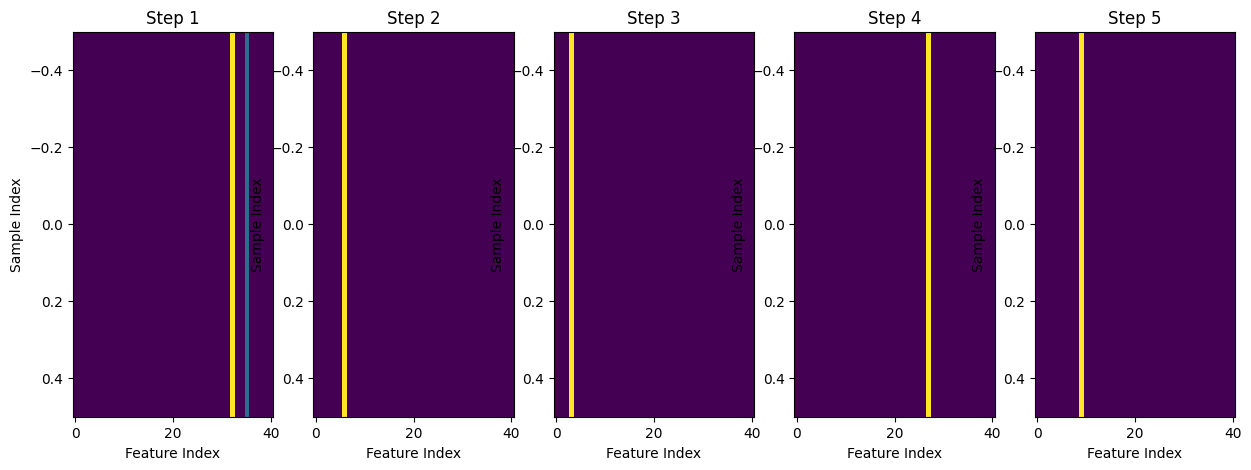

In [18]:
# 특정 샘플 선택 (예: 첫 번째 샘플)
X_sample = X_val[:1]

# 지역 해석 수행
explain_matrix, masks = clf.explain(X_sample)

# 마스크 시각화 (각 결정 단계별로 Feature 중요도 확인)
import matplotlib.pyplot as plt
import numpy as np

num_steps = len(masks)  # 결정 단계 개수
fig, axs = plt.subplots(1, num_steps, figsize=(15, 5))

for i in range(num_steps):
    mask = masks[i]  # (1, feature_dim) 형태
    mask = mask.reshape(-1, mask.shape[-1])  # 차원 맞추기 (1D로 변환)

    axs[i].imshow(mask, aspect="auto", cmap="viridis")
    axs[i].set_title(f"Step {i+1}")
    axs[i].set_xlabel("Feature Index")
    axs[i].set_ylabel("Sample Index")

plt.show()


In [19]:
# 특정 샘플 선택 (예: 첫 번째 샘플)
X_sample = X_val[:1]

# 지역 해석 수행
explain_matrix, masks = clf.explain(X_sample)

# 각 결정 단계에서 사용된 feature 인덱스 출력
num_steps = len(masks)  # 결정 단계 개수

for step in range(num_steps):
    mask = masks[step]  # (1, feature_dim) 형태
    feature_indices = np.where(mask[0] > 0)[0]  # 중요도가 0이 아닌 feature 인덱스 추출

    print(f"Step {step + 1}: Used Feature Indices -> {feature_indices.tolist()}")


Step 1: Used Feature Indices -> [32, 35]
Step 2: Used Feature Indices -> [6]
Step 3: Used Feature Indices -> [3]
Step 4: Used Feature Indices -> [27]
Step 5: Used Feature Indices -> [9]


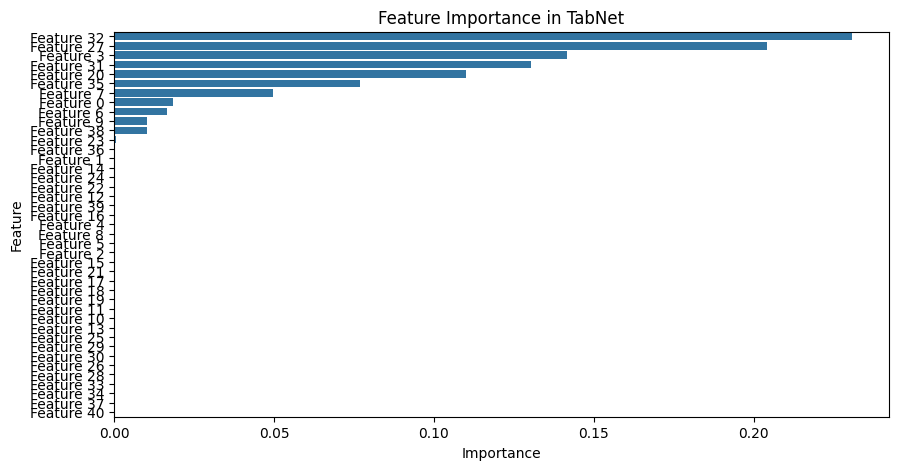

In [20]:
# 전역적 feature importance 확인
import pandas as pd

feature_importance = clf.feature_importances_
feature_names = [f"Feature {i}" for i in range(len(feature_importance))]

# 데이터프레임 변환 후 정렬
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in TabNet")
plt.show()


In [ ]:
32 27 3 31 20 35 7 0 6 9 28 34


0 3 6 7 9 20 27 28 31 32 34 35

In [22]:
#0 3 6 7 9 20 27 28 31 32 34 35
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term_int                             373028 non-null  int64  
 1   emp_length_int                       373028 non-null  int64  
 2   mths_since_issue_d                   373028 non-null  float64
 3   int_rate                             373028 non-null  float64
 4   mths_since_earliest_cr_line          373028 non-null  float64
 5   delinq_2yrs                          373028 non-null  float64
 6   inq_last_6mths                       373028 non-null  float64
 7   open_acc                             373028 non-null  float64
 8   pub_rec                              373028 non-null  float64
 9   total_acc                            373028 non-null  float64
 10  acc_now_delinq                       373028 non-null  float64
 11  total_rev_hi_